In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Refueling - No penalties

In [2]:
def payload_i (x,y,beta_i):
    Hi=np.exp(-beta_i *y/x) -x**2 *(1-np.exp(-y/x))
    return Hi



def payload_mission(x,y,sequence):
    assert np.abs(np.sum(sequence)- 1)<1e-6, "Error: The sum of betas must be equal to 1"
    H_list=[]
    for beta_i in sequence:
        H_list.append(payload_i(x,y,beta_i))
    Hm=np.min(H_list)
    return Hm


def time_coeff (x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau


def specific_fuel_cons(x,y,sequence):
    mp_refuel= np.sum(1-np.exp(-sequence *y/x))
    Hm=payload_mission(x,y,sequence)
    f=mp_refuel/Hm
    return f

# Refueling - with penalties

In [3]:
def payload_i_penalty (x,y,gamma,beta_i):
    Hi=np.exp(-(1+gamma)*beta_i *y/x) -x**2 *(1-np.exp(-y/x))
    return Hi



def payload_mission_penalty(x,y,gamma,sequence):
    H_list=[]
    for beta_i in sequence[:-1]:
        H_list.append(payload_i_penalty (x,y,gamma,beta_i))
    H_list.append(payload_i(x,y,sequence[-1]))
        
    Hm=np.min(H_list)
    return Hm



def time_coeff_penalty (x,y,gamma,sequence):
    mp_refuel= np.sum(1-np.exp(-(1+gamma)*sequence[:-1] *y/x)) + 1-np.exp(-sequence[-1]*y/x)
    mp_star=1-np.exp(-y/x)
    tau=mp_refuel/mp_star
    return tau




def specific_fuel_cons_penalty(x,y,gamma,sequence):
    mp_refuel= np.sum(1-np.exp(-(1+gamma)*sequence[:-1] *y/x)) + 1-np.exp(-sequence[-1]*y/x)
    Hm= payload_mission_penalty(x,y,gamma,sequence)
    f=mp_refuel/Hm
    return f

# Reproduce results without refueling

<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_19478/4250233077.py:10: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(x_vec,H,label=f"$\Delta v/v_{{ch}}$ = {y}")


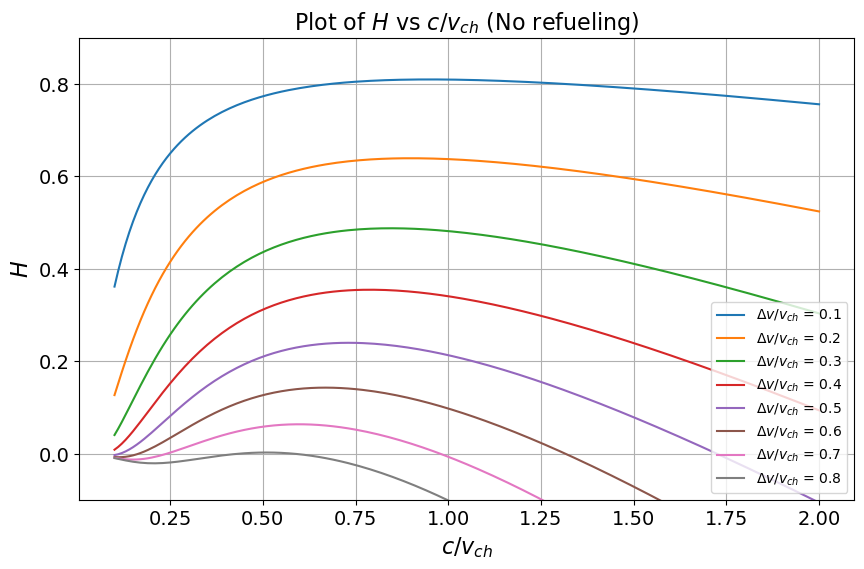

In [4]:
y_vec=np.array([.1,.2,.3,.4,.5,.6,.7,.8])
x_vec=np.arange(0.1,2.01,0.01)


fig=plt.figure(figsize=(10,6))
max_H=[]
opt_r2=[]
for y in y_vec:
    H=payload_i(x_vec,y,1)
    plt.plot(x_vec,H,label=f"$\Delta v/v_{{ch}}$ = {y}")
    
plt.ylim([-.1,.9])
    
plt.xlabel('$c/v_{ch}$',fontsize=16)  
plt.ylabel('$H$',fontsize=16)   
plt.title(r'Plot of $H$ vs $c/v_{ch}$ (No refueling)',fontsize=16)  
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/HvsC_No_refueling.png",bbox_inches='tight')
plt.show()

<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
/var/folders/xc/wwmv09fx49ldb0xqhs8v6zsm0000gn/T/ipykernel_19478/4248002425.py:26: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel('$\Delta v/v_{ch}$',fontsize=16)


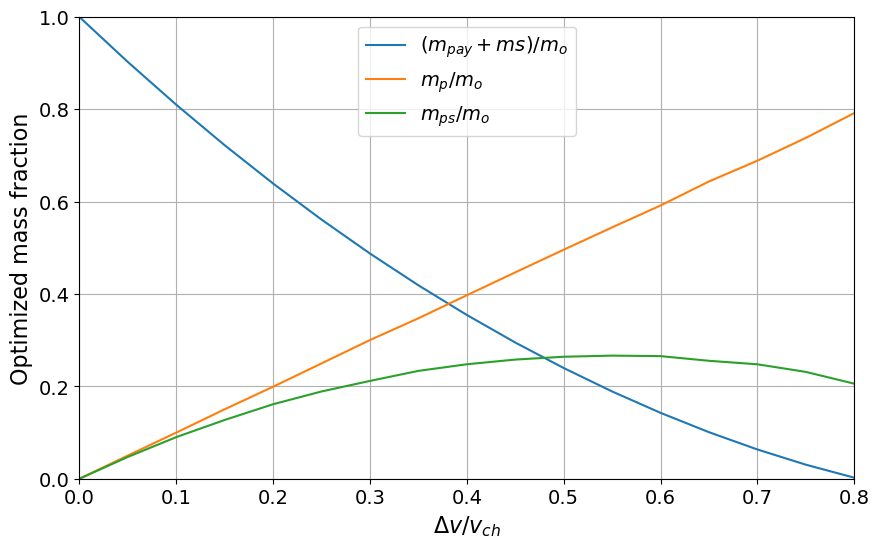

In [10]:
x_vec=np.arange(0.1,2.01,0.01)
y_vec=np.arange(0,0.81,0.05)

max_H=[]
opt_r2=[]
opt_mp=[]
opt_mps=[]
for y in y_vec:
    H=payload_i(x_vec,y,1)
    x_opt=x_vec[np.argmax(H)]
    mp=1-np.exp(-y/x_opt)
    mps=(x_opt**2) *(1-np.exp(-y/x_opt))
    
    max_H.append(np.max(H)) 
    opt_mp.append(np.min(mp))
    opt_mps.append(np.min(mps))
    
fig=plt.figure(figsize=(10,6))    
plt.plot(y_vec,max_H,label=r"$(m_{pay}+m{s})/m_o$")
plt.plot(y_vec,opt_mp,label=r"$m_p/m_o$")
plt.plot(y_vec,opt_mps,label=r"$m_{ps}/m_o$")
 
plt.xlim([0,0.8])   
plt.ylim([0,1])
    
plt.xlabel('$\Delta v/v_{ch}$',fontsize=16)  
plt.ylabel('Optimized mass fraction',fontsize=16)     
plt.legend(loc="best",fontsize=14)  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("figures/fractions_No_refueling.png",bbox_inches='tight')
plt.show()

# Consider refueling with penalty

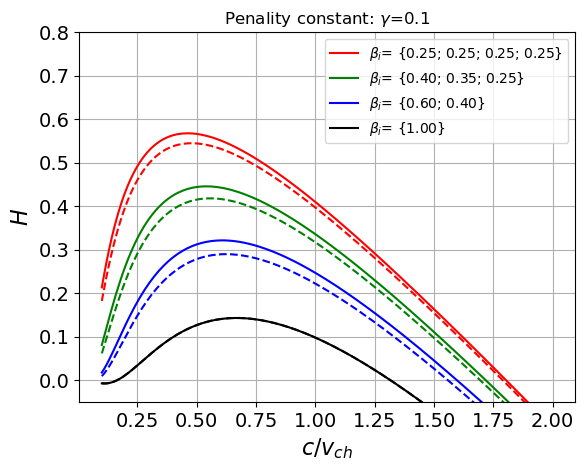

In [47]:
y=0.6
gamma=0.1
x_vec = np.arange(0.1, 2.01, 0.01)

sequence_list = list((np.array([.25, .25, .25, .25]), 
                      np.array([.4, .35, .25]), 
                      np.array([.6, .4]), 
                      np.array([1])))

color_list=["r","g","b","k"]


fig=plt.figure()
for idx, sequence in enumerate(sequence_list):

    Hm_noref=[]
    Hm_ref=[]

    for x in x_vec:
        Hm_noref.append(payload_mission(x,y,sequence))
        Hm_ref.append(payload_mission_penalty(x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,Hm_noref,"-",color=color_list[idx],label=str)
    plt.plot(x_vec,Hm_ref,"--",color=color_list[idx])
    
plt.ylim([-.05,.8])
plt.xlabel(r'$c/v_{ch}$',fontsize=16)  
plt.ylabel(r'$H$',fontsize=16)   
plt.title(rf"Penality constant: $\gamma$={gamma}")
plt.legend(loc="lower right")  
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()



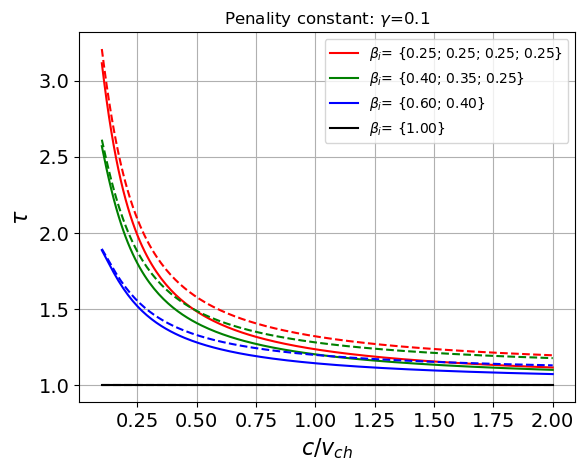

In [54]:
fig=plt.figure()
for idx, sequence in enumerate(sequence_list):

    tau_noref=[]
    tau_ref=[]


    for x in x_vec:
        tau_noref.append(time_coeff(x,y,sequence))
        tau_ref.append(time_coeff_penalty (x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,tau_noref,"-",color=color_list[idx],label=str)
    plt.plot(x_vec,tau_ref,"--",color=color_list[idx])
    
plt.xlabel(r'$c/v_{ch}$',fontsize=16)  
plt.ylabel(r'$\tau$',fontsize=16)  
plt.title(rf"Penality constant: $\gamma$={gamma}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

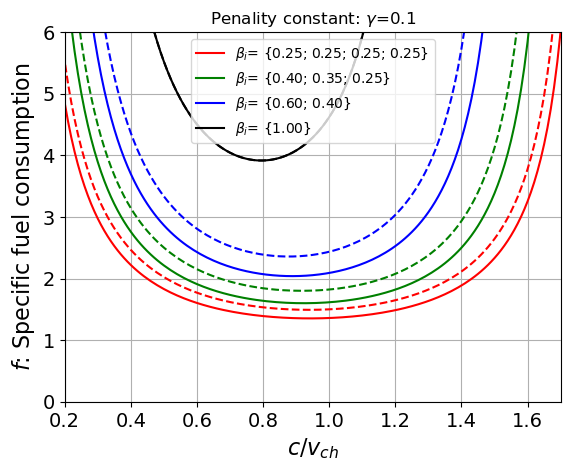

In [71]:
x_vec = np.arange(0.1, 2.01, 0.01)

x_vec_list = [(np.arange(0.1, 2.01, 0.01)), 
                     np.arange(0.1, 1.65, 0.01), 
                      np.arange(0.1, 1.5, 0.01), 
                     np.arange(0.1, 1.2, 0.01)]



fig=plt.figure()
for idx, sequence in enumerate(sequence_list):
    
    f_noref=[]
    f_ref=[]
    
    x_vec=x_vec_list[idx]
    
    for x in x_vec:
        f_noref.append(specific_fuel_cons(x,y,sequence))
        f_ref.append(specific_fuel_cons_penalty(x,y,gamma,sequence))


    str = r'$\beta_i$= {' + '; '.join([f"{beta:.2f}" for beta in sequence]) + '}'
    
    plt.plot(x_vec,f_noref,"-",color=color_list[idx],label=str)
    plt.plot(x_vec,f_ref,"--",color=color_list[idx])
    
plt.xlabel(r'$c/v_{ch}$',fontsize=16)  
plt.ylabel(r'$f$: Specific fuel consumption',fontsize=16)    
plt.title(rf"Penality constant: $\gamma$={gamma}")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0.2,1.7])
plt.ylim([0,6])
plt.legend(loc="best")